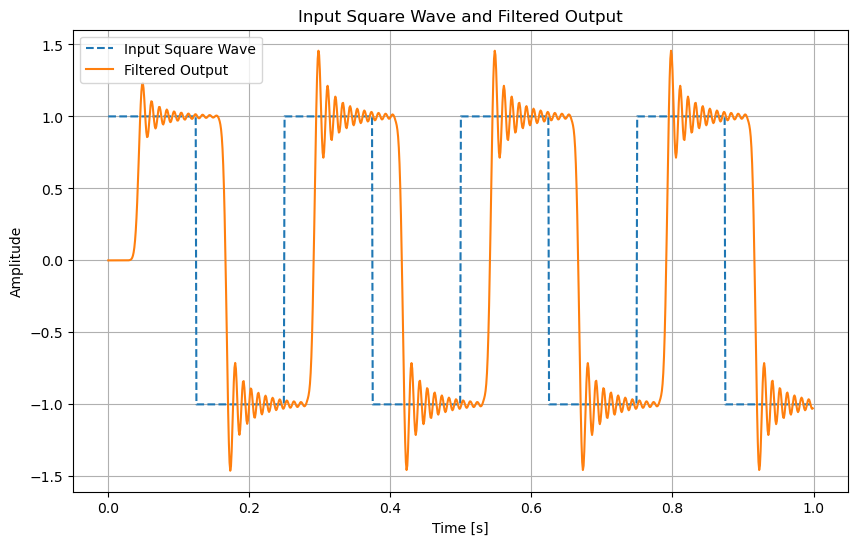

In [17]:
# butterworth filter analysis: SQUARE WAVE FILTERING
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square, lsim, TransferFunction, buttap, lp2lp, zpk2tf

# Butterworth low-pass filter cutoff: 100 Hz
order = 40
cutoff_freq_hz = 100  # Cutoff frequency in Hz
cutoff_freq_rad = 2 * np.pi * cutoff_freq_hz  # Convert to rad/s

# Generate a square wave
frequency = 4 # Frequency of the square wave in Hz
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
square_wave = square(2 * np.pi * frequency * t)

# Create the Butterworth low-pass filter
z, p, k = buttap(order)  # 4th order Butterworth filter
num, denom = zpk2tf(z, p, k)
num, denom = lp2lp(num, denom, cutoff_freq_rad)  # Denormalize cutoff frequency

filterTF = TransferFunction(num, denom)

# Simulate the filter response to the square wave
t_out, output, _ = lsim(filterTF, square_wave, t)

# Plotting the input square wave and the filter output on the same graph
plt.figure(figsize=(10, 6))
plt.plot(t, square_wave, label='Input Square Wave', linestyle='--')
plt.plot(t_out, output, label='Filtered Output', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Input Square Wave and Filtered Output')
plt.legend()
plt.grid(True)
plt.show()


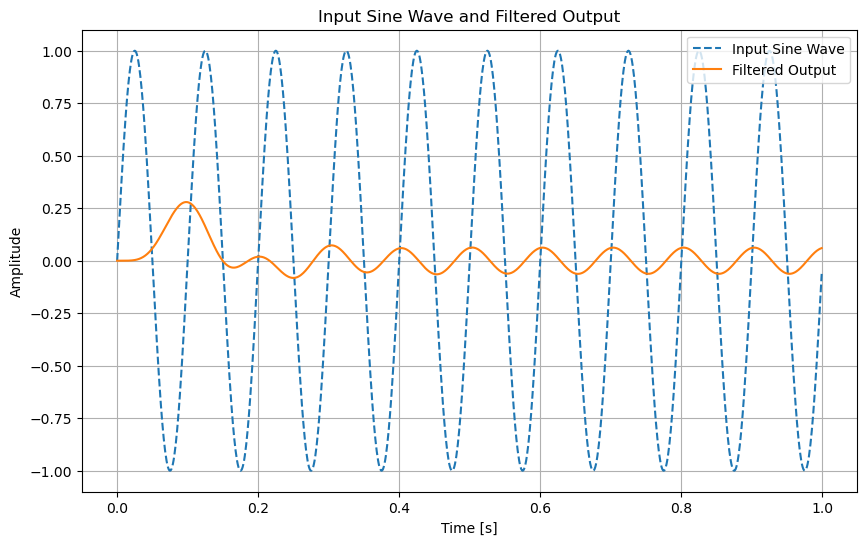

In [20]:
# butterworth filter analysis: SINE WAVE FILTERING
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lsim, TransferFunction, buttap, lp2lp, zpk2tf

# Butterworth low-pass filter cutoff: 100 Hz
order = 4
cutoff_freq_hz = 5  # Cutoff frequency in Hz
cutoff_freq_rad = 2 * np.pi * cutoff_freq_hz  # Convert to rad/s

# Generate a sine wave
frequency = 10  # Frequency of the sine wave in Hz
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
sine_wave = np.sin(2 * np.pi * frequency * t)

# Create the Butterworth low-pass filter
z, p, k = buttap(order)  # 4th order Butterworth filter
num, denom = zpk2tf(z, p, k)
num, denom = lp2lp(num, denom, cutoff_freq_rad)  # Denormalize cutoff frequency

filterTF = TransferFunction(num, denom)

# Simulate the filter response to the sine wave
t_out, output, _ = lsim(filterTF, sine_wave, t)

# Plotting the input sine wave and the filter output on the same graph
plt.figure(figsize=(10, 6))
plt.plot(t, sine_wave, label='Input Sine Wave', linestyle='--')
plt.plot(t_out, output, label='Filtered Output', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Input Sine Wave and Filtered Output')
plt.legend()
plt.grid(True)
plt.show()


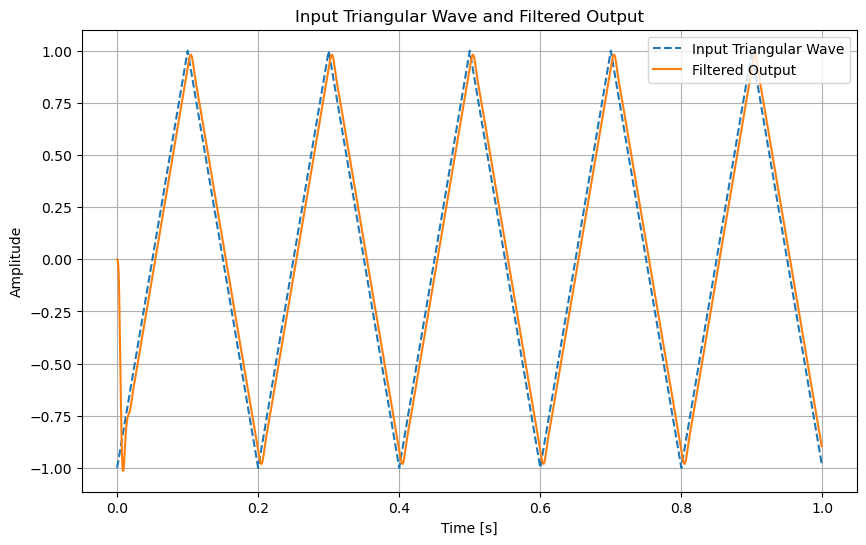

In [21]:
# Butterworth filter analysis: TRIANGULAR WAVE FILTERING
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import sawtooth, lsim, TransferFunction, buttap, lp2lp, zpk2tf

# Butterworth low-pass filter cutoff: 100 Hz
order = 4
cutoff_freq_hz = 100  # Cutoff frequency in Hz
cutoff_freq_rad = 2 * np.pi * cutoff_freq_hz  # Convert to rad/s

# Generate a triangular wave
frequency = 5  # Frequency of the triangular wave in Hz
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
triangular_wave = sawtooth(2 * np.pi * frequency * t, width=0.5)

# Create the Butterworth low-pass filter
z, p, k = buttap(order)  # 4th order Butterworth filter
num, denom = zpk2tf(z, p, k)
num, denom = lp2lp(num, denom, cutoff_freq_rad)  # Denormalize cutoff frequency

filterTF = TransferFunction(num, denom)

# Simulate the filter response to the triangular wave
t_out, output, _ = lsim(filterTF, triangular_wave, t)

# Plotting the input triangular wave and the filter output on the same graph
plt.figure(figsize=(10, 6))
plt.plot(t, triangular_wave, label='Input Triangular Wave', linestyle='--')
plt.plot(t_out, output, label='Filtered Output', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Input Triangular Wave and Filtered Output')
plt.legend()
plt.grid(True)
plt.show()

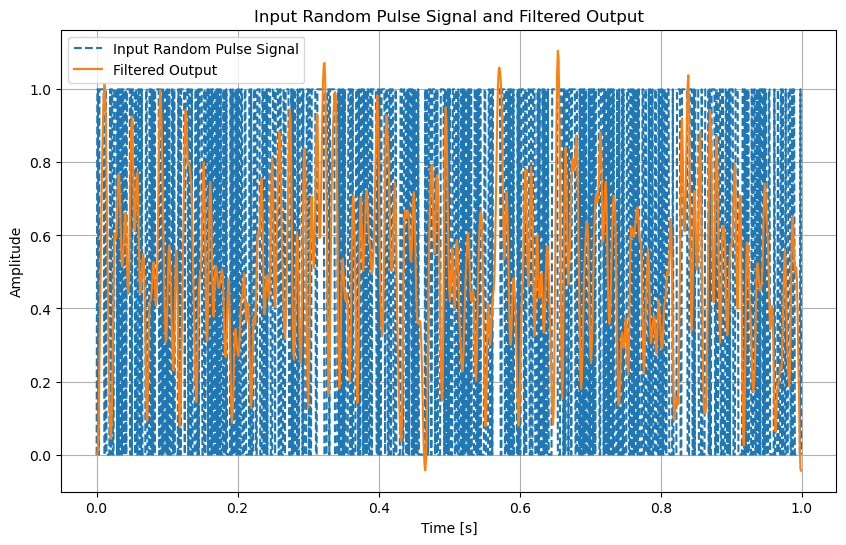

In [22]:
# Butterworth filter analysis: RANDOM PULSE SIGNAL FILTERING
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lsim, TransferFunction, buttap, lp2lp, zpk2tf

# Butterworth low-pass filter cutoff: 100 Hz
order = 4
cutoff_freq_hz = 100  # Cutoff frequency in Hz
cutoff_freq_rad = 2 * np.pi * cutoff_freq_hz  # Convert to rad/s

# Generate a random pulse signal
np.random.seed(0)  # For reproducibility
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
random_pulse = np.random.randint(0, 2, size=len(t))  # Random binary pulse signal (0 or 1)

# Create the Butterworth low-pass filter
z, p, k = buttap(order)  # 4th order Butterworth filter
num, denom = zpk2tf(z, p, k)
num, denom = lp2lp(num, denom, cutoff_freq_rad)  # Denormalize cutoff frequency

filterTF = TransferFunction(num, denom)

# Simulate the filter response to the random pulse signal
t_out, output, _ = lsim(filterTF, random_pulse, t)

# Plotting the input random pulse signal and the filter output on the same graph
plt.figure(figsize=(10, 6))
plt.plot(t, random_pulse, label='Input Random Pulse Signal', linestyle='--')
plt.plot(t_out, output, label='Filtered Output', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Input Random Pulse Signal and Filtered Output')
plt.legend()
plt.grid(True)
plt.show()


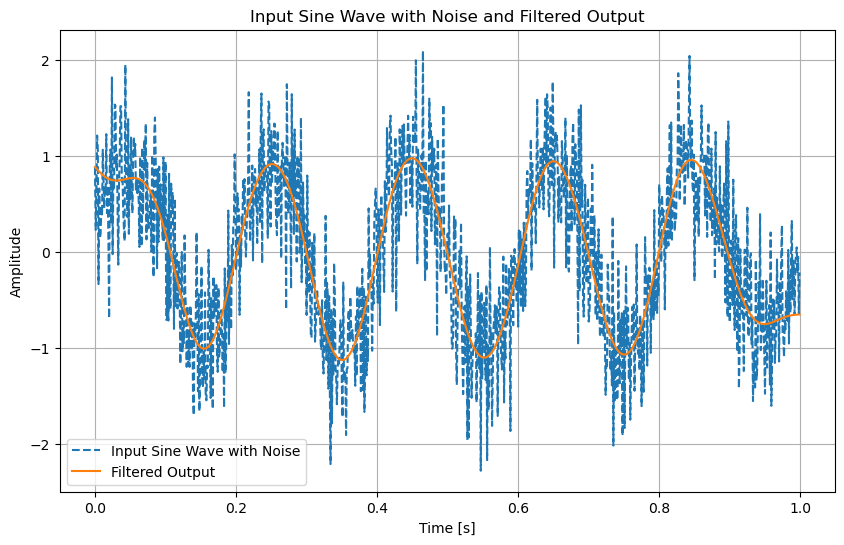

In [24]:
# Butterworth filter analysis: SINE WAVE WITH NOISE FILTERING
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lsim, TransferFunction, butter, filtfilt

# Generate a sine wave with noise
np.random.seed(0)  # For reproducibility
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
frequency = 5  # Frequency of the sine wave in Hz
sine_wave = np.sin(2 * np.pi * frequency * t)
noise = 0.5 * np.random.normal(size=len(t))  # Gaussian noise

sine_wave_with_noise = sine_wave + noise

# Create a Butterworth low-pass filter
order = 4
cutoff_freq_hz = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency for 1 Hz sampling rate
cutoff_freq_normalized = cutoff_freq_hz / nyquist_freq  # Normalize cutoff frequency
b, a = butter(order, cutoff_freq_normalized, 'low')

# Filter the sine wave with noise using the Butterworth filter
filtered_signal = filtfilt(b, a, sine_wave_with_noise)

# Plotting the input sine wave with noise and the filtered output on the same graph
plt.figure(figsize=(10, 6))
plt.plot(t, sine_wave_with_noise, label='Input Sine Wave with Noise', linestyle='--')
plt.plot(t, filtered_signal, label='Filtered Output', linestyle='-')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Input Sine Wave with Noise and Filtered Output')
plt.legend()
plt.grid(True)
plt.show()


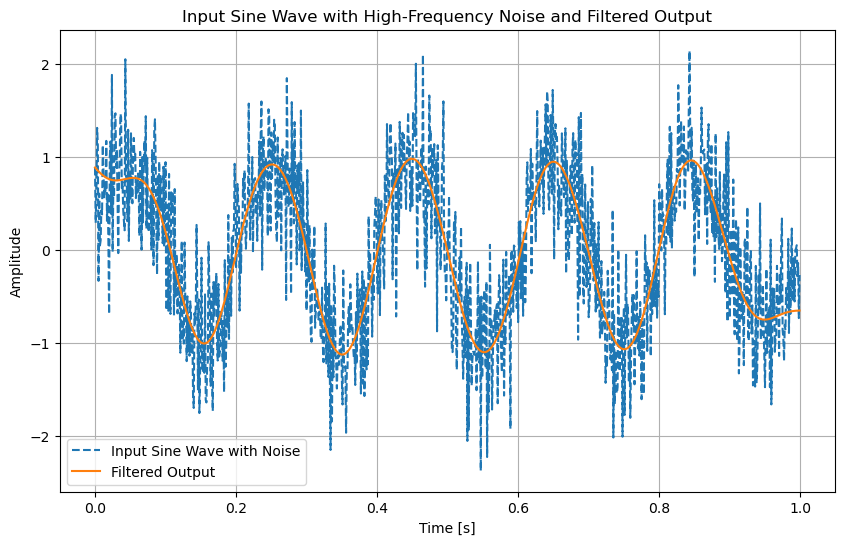

In [2]:
# Butterworth filter analysis: SINE WAVE WITH NOISE (HIGH-FREQUENCY) FILTERING
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lsim, TransferFunction, butter, filtfilt

# Generate a sine wave with noise (high-frequency component)
np.random.seed(0)  # For reproducibility
t = np.linspace(0, 1, 1000, endpoint=False)  # Time vector
frequency = 5  # Frequency of the sine wave in Hz
sine_wave = np.sin(2 * np.pi * frequency * t)
noise_low_freq = 0.5 * np.random.normal(size=len(t))  # Low-frequency Gaussian noise
noise_high_freq = 0.1 * np.sin(2 * np.pi * 100 * t)  # High-frequency component
sine_wave_with_noise = sine_wave + noise_low_freq + noise_high_freq

# Create a Butterworth low-pass filter
order = 4
cutoff_freq_hz = 10  # Cutoff frequency in Hz
nyquist_freq = 0.5 * 1000  # Nyquist frequency for 1 Hz sampling rate
cutoff_freq_normalized = cutoff_freq_hz / nyquist_freq  # Normalize cutoff frequency
b, a = butter(order, cutoff_freq_normalized, 'low')

# Filter the sine wave with noise using the Butterworth filter
filtered_signal = filtfilt(b, a, sine_wave_with_noise)

# Plotting the input sine wave with noise and the filtered output on the same graph
plt.figure(figsize=(10, 6))
plt.plot(t, sine_wave_with_noise, label='Input Sine Wave with Noise', linestyle='--')
plt.plot(t, filtered_signal, label='Filtered Output', linestyle='-')
plt.xlabel('Time[s]')
plt.ylabel('Amplitude')
plt.title('Input Sine Wave with High-Frequency Noise and Filtered Output')
plt.legend()
plt.grid(True)
plt.show()